In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao16"
CAND1_PATH = "data/paredao16/babu.csv"
CAND2_PATH = "data/paredao16/manu.csv"
CAND3_PATH = "data/paredao16/mari.csv"
DATE = 4
IGNORE_HASHTAGS = ["#bbb20", "#redebbb", "#bbb2020"]

In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand2 = candidate2_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand3 = candidate3_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]

# Babu

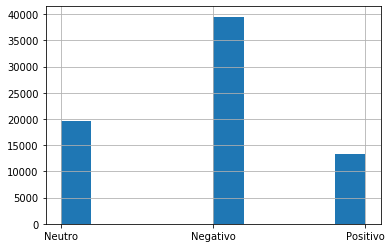

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment,date,likes_count,retweets_count,hashtags
0,Kkkkkkkkkk,Neutro,2020-04-21,0,0,[]
1,Chumbo n decepciona nuncaaaa fora manuuuu,Negativo,2020-04-21,0,0,[]
2,FORA MANU,Neutro,2020-04-21,2,0,[]
3,#FicaBabu,Positivo,2020-04-21,0,0,['#ficababu']
4,Ele tem muito carinho por vc,Positivo,2020-04-21,3,0,[]
...,...,...,...,...,...,...
72275,"Fora Mari, se vocês querem o Babu campeão na f...",Negativo,2020-04-19,1,0,[]
72276,"#ForaManu \nnão vacilem, colocam o babu em per...",Negativo,2020-04-19,0,0,['#foramanu']
72277,puxa #ForaMari,Negativo,2020-04-19,2,0,['#foramari']
72278,"O lance é que tem mais um paredão, se for ele ...",Negativo,2020-04-19,0,0,[]


# Manu

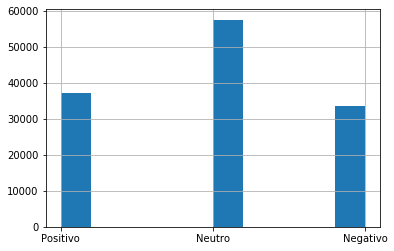

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment,date,likes_count,retweets_count,hashtags
0,"O meu fica assim, quero muito votar 🙏🏽 pic.twi...",Positivo,2020-04-21,0,0,[]
1,#FicaManu,Neutro,2020-04-21,0,0,['#ficamanu']
2,+1710,Neutro,2020-04-21,0,0,[]
3,Se a Manu ficar,Neutro,2020-04-21,0,0,[]
4,#FicaManu pic.twitter.com/qShRi74m3X,Neutro,2020-04-21,0,0,['#ficamanu']
...,...,...,...,...,...,...
128171,Manu convencendo babu a deixar elas maquiarem ...,Neutro,2020-04-19,0,0,['#bbb20']
128172,Dua Lipa nota Manu Gavassi por coreografia no ...,Neutro,2020-04-19,36,5,['#bbb20']
128173,Meu paredão dos sonhos Rafa x Manu x Babu 🙏🏻🙏🏻...,Positivo,2020-04-19,0,0,['#bbb20']
128174,Pelo amor de Deusssssss @cea_brasil libera des...,Positivo,2020-04-19,2,0,['#bbb20']


# Mari (eliminada)

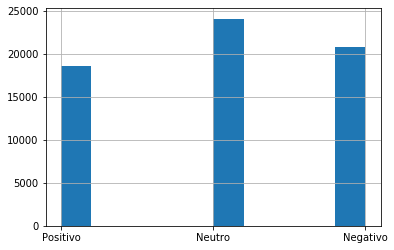

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment,date,likes_count,retweets_count,hashtags
0,Entenda @marigonzalez você é perfeita para mim...,Positivo,2020-04-21,2,0,[]
1,#FicaMari,Neutro,2020-04-21,0,0,['#ficamari']
2,"Xiiiii chamou de amiga, Corre Mari",Neutro,2020-04-21,0,0,[]
3,Vai pra onde boca de bodo,Negativo,2020-04-21,0,0,[]
4,+ 3 mil votos na Mari #ForaMari pic.twitter.co...,Neutro,2020-04-21,0,0,['#foramari']
...,...,...,...,...,...,...
63383,"Gente é oficial, eu AMO A MARI #BBB20",Positivo,2020-04-19,0,0,['#bbb20']
63384,Mari pegou a mania da Ivy. Gritarrrrrrr #BBB20,Neutro,2020-04-19,4,0,['#bbb20']
63385,Esse grito da Mari kkkkk morri #bbb20,Positivo,2020-04-19,0,0,['#bbb20']
63386,Genial a ideia de Mari #BBB20,Positivo,2020-04-19,1,0,['#bbb20']


# Quantidades absolutas

In [11]:
candidates = {"babu": cand1, "manu_gavassi": cand2, "mari": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,13265,19519,39496
manu_gavassi,37097,57548,33531
mari,18531,24056,20801


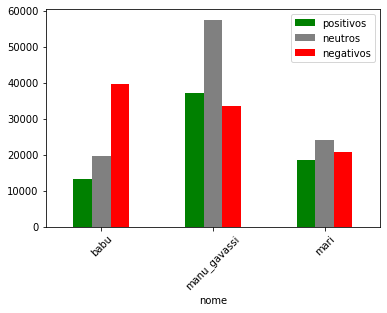

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.183522,0.270047,0.546431
manu_gavassi,0.289422,0.448976,0.261601
mari,0.292342,0.379504,0.328154


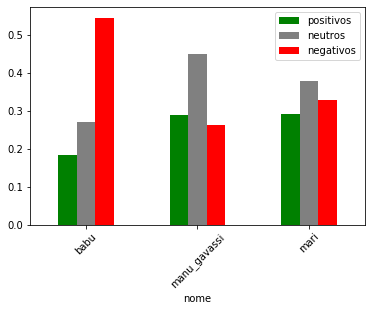

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.192545,0.193022,0.420940
manu_gavassi,0.538473,0.569089,0.357367
mari,0.268982,0.237889,0.221693


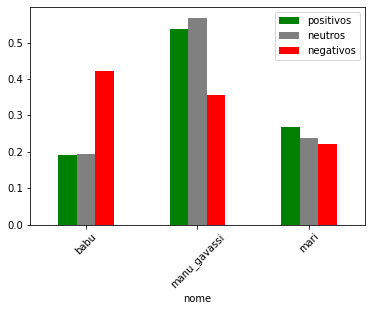

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [22]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

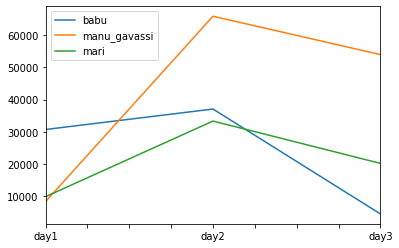

In [23]:
tweets_by_day_df.transpose().plot()

# Análise de hashtags

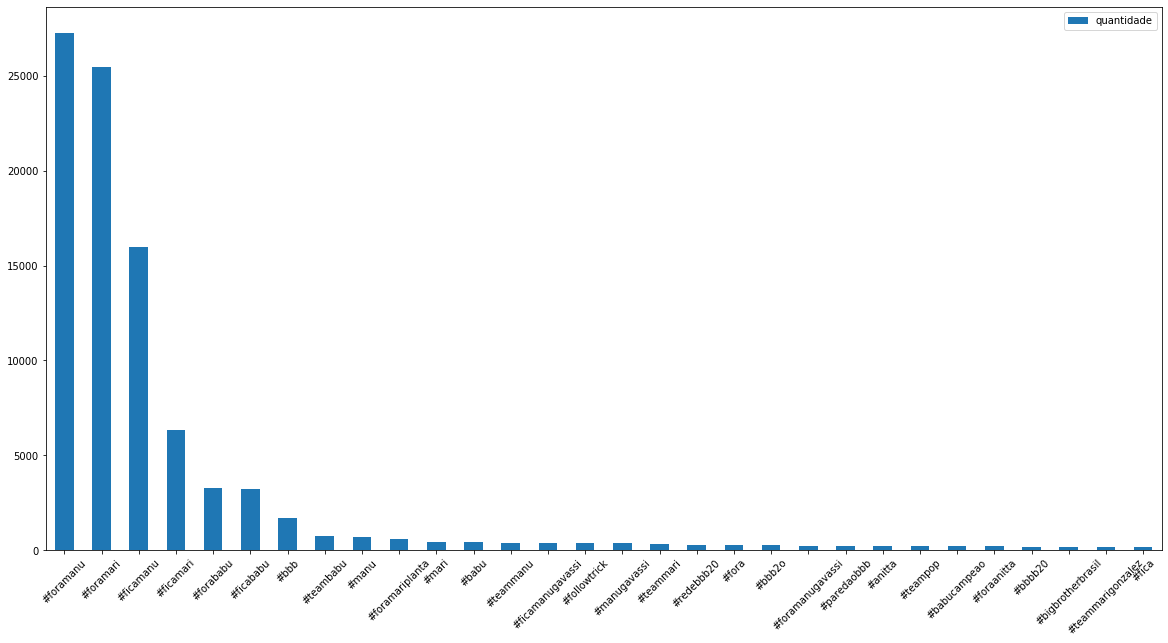

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

unique_df = get_unique_hashtags(list(candidates.values()))
unique_df.drop(index=IGNORE_HASHTAGS, inplace=True)
unique_df.sort_values(by="quantidade", ascending=False).head(30).plot.bar(rot=45)

In [25]:
alias = {"babu": "babu", "manu_gavassi": "manu", "mari": "mari"}
fica_fora_df = get_fica_fora_quantities(unique_df, alias)


In [26]:
fica_fora_df

,fica,fora
babu,3229,3266
manu_gavassi,15957,27271
mari,6314,25433


# Seleção de atributos

In [27]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)
atributes_df = atributes_df.join(fica_fora_df)

In [28]:
raw_participantes_info = get_participantes_info()[DATE]
print("Seguidores atualizados em:", raw_participantes_info["date"])

Seguidores atualizados em: 2020-04-17 21:56:00.786280


In [29]:
participantes_info = raw_participantes_info["infos"]
paredoes_info = get_paredoes_info()

In [30]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [31]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [32]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [33]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [34]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [35]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,fica,fora,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,,,
babu,13265,19519,39496,0.183522,0.270047,0.546431,0.192545,0.193022,0.420940,30713,37056,4511,3229,3266,756662,51204,735315,0.0458
manu_gavassi,37097,57548,33531,0.289422,0.448976,0.261601,0.538473,0.569089,0.357367,8348,65859,53969,15957,27271,2777914,287943,4916179,0.4126
mari,18531,24056,20801,0.292342,0.379504,0.328154,0.268982,0.237889,0.221693,9861,33329,20198,6314,25433,1492459,174831,344116,0.5416


In [36]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))